In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import seaborn as sns

/home/bobby/code-repo/practices/llm-examples/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# dataset = load_dataset('Zhongxing0129/authorlist_train', trust_remote_code=True, split = 'train')
dataset = load_dataset('tasksource/imdb62', trust_remote_code=True, split = 'train')

dataset


Dataset({
    features: ['reviewId', 'userId', 'itemId', 'rating', 'title', 'content'],
    num_rows: 61987
})

In [3]:
## clean the dataset

# convert to dataframe
dataset_df = pd.DataFrame(dataset)

# remove NA values
dataset_df = dataset_df[~dataset_df['content'].isna()].reset_index(drop = True)

dataset_df

,reviewId,userId,itemId,rating,title,content
0,490485,33913,444584,1.0,Somebody call PETA !,I caught glimpses of this show which feature a...
1,490043,33913,123366,1.0,Just Awful ! Mail Rosie a mussel to shut her b...,"Believe it or not , I watched this show in the..."
2,490772,33913,117509,1.0,It's not for me ! I just hated it !,After only watching a few minutes of this adap...
3,490415,33913,169455,2.0,"Rosie O'Donnell , Barbara Walters , What has t...",I'm sorry but Rosie O'Donnell talking about he...
4,490180,33913,1191056,2.0,I thought the Kardashians were bad !,"Okay , the reality show premise is five housew..."
...,...,...,...,...,...,...
61968,452369,15896852,36241,10.0,Nursing the Outlaw,Jane Russell nurses Jack Buetel back to health...
61969,452787,15896852,9796,10.0,The Slow Acid of Discontent ( Do You Hear Voic...,"Raymond Hatton is "" John Tremble - 2nd Assista..."
61970,453318,15896852,18578,10.0,Shooting Stars,"In a small town , youthful dreams play out . W..."
61971,452895,15896852,38057,10.0,Mona Lisa Without the Smile,Lowly cashier Edward G . Robinson ( as Christo...


<Axes: xlabel='content', ylabel='Count'>

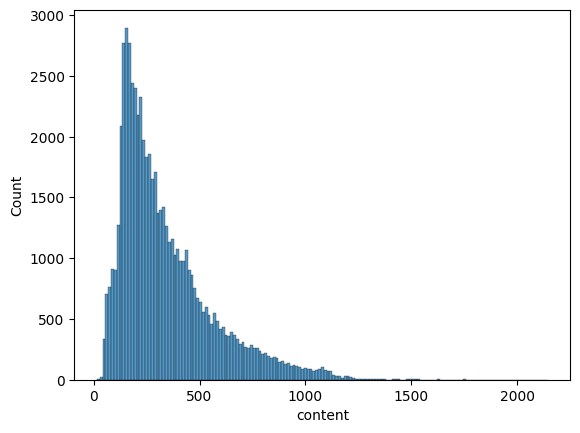

In [4]:
import seaborn as sns

length_of_content = pd.Series(dataset_df['content'].str.split().apply(len))

sns.histplot(data = length_of_content)

In [5]:
## filter and select only content with lengths between these
min_word_len = 250
max_word_len = 3000

dataset_df = dataset_df[dataset_df['content'].str.split().apply(len).between(min_word_len, max_word_len)].reset_index()
dataset_df

,index,reviewId,userId,itemId,rating,title,content
0,0,490485,33913,444584,1.0,Somebody call PETA !,I caught glimpses of this show which feature a...
1,1,490043,33913,123366,1.0,Just Awful ! Mail Rosie a mussel to shut her b...,"Believe it or not , I watched this show in the..."
2,2,490772,33913,117509,1.0,It's not for me ! I just hated it !,After only watching a few minutes of this adap...
3,3,490415,33913,169455,2.0,"Rosie O'Donnell , Barbara Walters , What has t...",I'm sorry but Rosie O'Donnell talking about he...
4,4,490180,33913,1191056,2.0,I thought the Kardashians were bad !,"Okay , the reality show premise is five housew..."
...,...,...,...,...,...,...,...
34326,61968,452369,15896852,36241,10.0,Nursing the Outlaw,Jane Russell nurses Jack Buetel back to health...
34327,61969,452787,15896852,9796,10.0,The Slow Acid of Discontent ( Do You Hear Voic...,"Raymond Hatton is "" John Tremble - 2nd Assista..."
34328,61970,453318,15896852,18578,10.0,Shooting Stars,"In a small town , youthful dreams play out . W..."
34329,61971,452895,15896852,38057,10.0,Mona Lisa Without the Smile,Lowly cashier Edward G . Robinson ( as Christo...


<Axes: xlabel='content', ylabel='Count'>

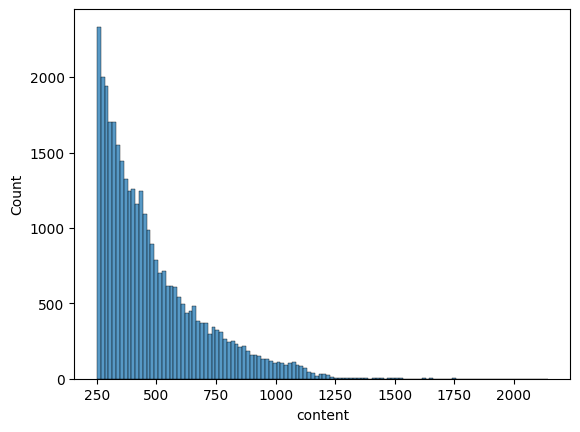

In [6]:
length_of_content = pd.Series(dataset_df['content'].str.split().apply(len))

sns.histplot(data = length_of_content)

In [7]:
dataset_df['userId'].value_counts()

userId
2721657    997
1355507    989
317399     984
3280905    982
819382     978
          ... 
865972      40
453228      39
386241      34
783721      15
70535        6
Name: count, Length: 62, dtype: int64

In [8]:
## take only a certain label. Multi-join itself, followed by sampling only 100
def function(df, sample_size = 500):
    data_a = df.sample(sample_size//2, random_state = 8)
    data_a['key'] = '1'
    data_b = df.sample(sample_size//2, random_state = 7)
    data_b['key'] = '1'
    data = data_a.merge(data_b, on = 'key')
    data.drop('key', axis = 1, inplace = True)
    
    unsimilar_values = data.sample(sample_size)

    data = df.merge(df, on = 'userId')

    similar_values = data.sample(sample_size)

    return unsimilar_values, similar_values

In [9]:
unsimilar_values, similar_values = function(dataset_df)
unsimilar_values

,index_x,reviewId_x,userId_x,itemId_x,rating_x,title_x,content_x,index_y,reviewId_y,userId_y,itemId_y,rating_y,title_y,content_y
7338,40508,372090,2488512,374180,7.0,Good Werewolf Romance Based on a True Story,"In 1852 , in Galicia , Spain , the traveling v...",30722,484413,1416505,29146,8.0,A great early biopic about an inspiring person .,Emile Zola was besides a famous French writer ...
47386,25689,483517,1293485,113670,8.0,Absolutely beautiful and memorizing,A few months ago I wanted The Secret Garden on...,49390,512967,3223254,284631,8.0,"Life , Death , Friendships and Other Anomalies",WALKING ON WATER is disturbing in the best sen...
12932,45974,568502,2721657,183649,10.0,Terror On The Phone Line,Phone Booth is a one of a kind thriller even...,31666,469187,1532177,274428,6.0,Many People Are Missing The Point,I remember seeing a clip from this film which ...
47653,23516,430059,1173088,142688,7.0,"Better than I expected , even if the ending le...",Dean Corso ( Johnny Depp ) is a mercenary book...,39736,394853,2483625,51819,8.0,The Great Champagne Offensive,"Kings Go Forth is one of , maybe the only , fi..."
49556,37816,422626,2248099,75029,8.0,Eastwood doing what Eastwood does best,"John Wayne fans may well disagree , but if you...",5853,494605,342623,41587,8.0,another winner from Joseph Mankiewicz,"One of Hollywood's best directors , Joseph Man..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13868,39662,395402,2483625,43286,8.0,Now who'd have thought angels would be helping...,"Before the New York Mets came along , the Pitt...",25094,481977,1293485,95956,3.0,"Normally , I love these action flicks , but . . .","Well , I was kind of disappointed with the thi..."
5080,39092,395731,2483625,36218,4.0,"The Plane , Errol , The Plane","In Northern Pursuit , the brothers Warner trie...",35729,449763,2093818,951351,8.0,Now this is more like what an RTS add-on shoul...,"As enjoyable as Covert Ops , for Command & Con..."
16614,58334,436608,9938570,24727,5.0,The Vampire Bat,"Someone ( or , something thing . . ) is leavin...",516,490328,33913,120888,8.0,A great fun film to watch for the whole family !,I was just watching the Wedding Singer last ni...
62221,49339,512910,3223254,472160,8.0,A Surprise Fable to Discover,PENELOPE may at first glance seem like one of ...,39953,393460,2483625,25316,10.0,The Hero As Comedian,"In his autobiography , The Name's Above the Ti..."


In [10]:
similar_values

,index_x,reviewId_x,userId,itemId_x,rating_x,title_x,content_x,index_y,reviewId_y,itemId_y,rating_y,title_y,content_y
22911009,54431,573599,4532636,57129,7.0,A Good Old-Fashioned Ghost Story,Robert Wise was never an especially artistic d...,54873,574280,55852,9.0,Spending Time with Cleo,"The Cleo in "" Cleo from 5 to 7 "" is a frivolou..."
8544487,26976,498792,1355507,95294,9.0,"Gore drenched sequel , well worth watching .",The first and only decent sequel to Clive Bark...,26368,499475,650890,5.0,Decent enough episode .,Monsters : The Mother Instinct starts as lying...
4553345,12851,544101,562732,70379,10.0,A Scorsese original .,One of the things that I love the most about w...,12921,544756,125439,10.0,The most shocking film in years .,"By shocking , of course , I mean shockingly GO..."
19621225,48569,366075,3109237,597044,6.0,Joe and Frank go to Egypt,"On their way to meet their dad , Frank and Joe...",48875,366044,64505,8.0,So very British,- Charlie Croker ( Michael Caine ) has been ou...
18505835,45958,568662,2721657,40366,9.0,The only way to successfully defeat evil is to...,SPOILERS John Garfield as big time mob lawyer ...,44984,568043,75845,3.0,What's Going On ?,( Slight Spoilers ) Running neck and neck with...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22558244,52748,571863,4248714,78966,8.0,The China Syndrome,"The title sounded familiar , and the three lea...",52428,571531,102057,6.0,Hook,This isn't a bad film directed by Steven Spiel...
20583159,49742,513039,3223254,444518,10.0,"An Extraordinary , Poignant Love Story : Love ...",' Un amour à taire ' ( A LOVE TO HIDE ) is one...,49393,513509,804461,8.0,Revenge and other forms of Madness,"DEATH SENTENCE is a tough movie to watch , not..."
1780809,5136,493635,342623,60463,6.0,frothy ' 60s comedy,"What a warm , wonderful actress Doris Day is ,...",5213,494995,32539,6.0,There's gold in them thar hills,Gold Rush Maisie has Maisie ( Ann Sothern ) ...
19131105,47417,427850,3079504,780503,6.0,Good but not great adaptation of an Osamu Tezu...,Film adaption of Osamu Tezuka's comic about a ...,47190,429010,317219,4.0,Worst Pixar feature is a slow dull retread of ...,I've seen Cars twice now I didn't like it eith...


In [11]:
unsimilar_values_trim = unsimilar_values[['content_x','content_y']]
similar_values_trim = similar_values[['content_x','content_y']]

In [12]:
similar_values_trim['model_response'] = 'positive'
similar_values_trim

/tmp/ipykernel_3801089/1698636393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_values_trim['model_response'] = 'positive'


,content_x,content_y,model_response
22911009,Robert Wise was never an especially artistic d...,"The Cleo in "" Cleo from 5 to 7 "" is a frivolou...",positive
8544487,The first and only decent sequel to Clive Bark...,Monsters : The Mother Instinct starts as lying...,positive
4553345,One of the things that I love the most about w...,"By shocking , of course , I mean shockingly GO...",positive
19621225,"On their way to meet their dad , Frank and Joe...",- Charlie Croker ( Michael Caine ) has been ou...,positive
18505835,SPOILERS John Garfield as big time mob lawyer ...,( Slight Spoilers ) Running neck and neck with...,positive
...,...,...,...
22558244,"The title sounded familiar , and the three lea...",This isn't a bad film directed by Steven Spiel...,positive
20583159,' Un amour à taire ' ( A LOVE TO HIDE ) is one...,"DEATH SENTENCE is a tough movie to watch , not...",positive
1780809,"What a warm , wonderful actress Doris Day is ,...",Gold Rush Maisie has Maisie ( Ann Sothern ) ...,positive
19131105,Film adaption of Osamu Tezuka's comic about a ...,I've seen Cars twice now I didn't like it eith...,positive


In [13]:
unsimilar_values_trim['model_response'] = 'negative'
unsimilar_values_trim

/tmp/ipykernel_3801089/3406770863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsimilar_values_trim['model_response'] = 'negative'


,content_x,content_y,model_response
7338,"In 1852 , in Galicia , Spain , the traveling v...",Emile Zola was besides a famous French writer ...,negative
47386,A few months ago I wanted The Secret Garden on...,WALKING ON WATER is disturbing in the best sen...,negative
12932,Phone Booth is a one of a kind thriller even...,I remember seeing a clip from this film which ...,negative
47653,Dean Corso ( Johnny Depp ) is a mercenary book...,"Kings Go Forth is one of , maybe the only , fi...",negative
49556,"John Wayne fans may well disagree , but if you...","One of Hollywood's best directors , Joseph Man...",negative
...,...,...,...
13868,"Before the New York Mets came along , the Pitt...","Well , I was kind of disappointed with the thi...",negative
5080,"In Northern Pursuit , the brothers Warner trie...","As enjoyable as Covert Ops , for Command & Con...",negative
16614,"Someone ( or , something thing . . ) is leavin...",I was just watching the Wedding Singer last ni...,negative
62221,PENELOPE may at first glance seem like one of ...,"In his autobiography , The Name's Above the Ti...",negative


In [14]:
final = pd.concat([similar_values_trim, unsimilar_values_trim], axis = 0).reset_index(drop = True)
final


,content_x,content_y,model_response
0,Robert Wise was never an especially artistic d...,"The Cleo in "" Cleo from 5 to 7 "" is a frivolou...",positive
1,The first and only decent sequel to Clive Bark...,Monsters : The Mother Instinct starts as lying...,positive
2,One of the things that I love the most about w...,"By shocking , of course , I mean shockingly GO...",positive
3,"On their way to meet their dad , Frank and Joe...",- Charlie Croker ( Michael Caine ) has been ou...,positive
4,SPOILERS John Garfield as big time mob lawyer ...,( Slight Spoilers ) Running neck and neck with...,positive
...,...,...,...
995,"Before the New York Mets came along , the Pitt...","Well , I was kind of disappointed with the thi...",negative
996,"In Northern Pursuit , the brothers Warner trie...","As enjoyable as Covert Ops , for Command & Con...",negative
997,"Someone ( or , something thing . . ) is leavin...",I was just watching the Wedding Singer last ni...,negative
998,PENELOPE may at first glance seem like one of ...,"In his autobiography , The Name's Above the Ti...",negative


In [22]:
final.iloc[1,1]

"Monsters : The Mother Instinct starts as lying , cheating , thieving & womanising Nelson ( Tom Gilroy ) persuades his wife Sheila ( Finn Carter ) to ask her well off mother ( Elizabeth Franz ) for money to help cover his debts , however she refuses & a fight ensues in which it comes to light that she has developed a special muscle energising serum from the enzymes of Melon's that gives whoever takes it super human strength for a short time . Sensing an opportunity to print money Nelson uses his gullible wife Shelia to find out the secret of the serum , when it's finally revealed Nelson wants it all for himself & Sheila finally sees him for what he really is but there is one last secret that Nelson hadn't bargained for . . . Episode fifteen from season one of Monster this originally aired in the US during February 1989 , directed by Bette Gordon this is an alright episode of Monsters but nothing special . The Disney styled plot about a magic serum that gives an old lady super human str

In [23]:
## prepare folder path
import os

## create directories to hold the model when they don't exist
working_dir = './datasets'

## it is recommended to store the models seperately
output_dir_prompt = os.path.join(working_dir, 'stylometry')

## create the directories if they don't exist
if not os.path.exists(output_dir_prompt):
    os.mkdir(output_dir_prompt)

In [24]:
final.to_csv(output_dir_prompt+'/zhongxing0129-authorlist_train-v3.csv', index = False)